**Keras LSTM on IMDB Dataset**

In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, BatchNormalization, LSTM
from keras.datasets import imdb
from keras.utils import plot_model
from IPython.display import Image
import matplotlib.pyplot as plt

Using TensorFlow backend.


**Load Data and Pad Sequence **

In [2]:
NumWords = 20000
MaxLen = 80
BatchSize = 64
EmbedDime = 128
Epochs = 5

(Xtrain, Ytrain), (Xtest, Ytest) = imdb.load_data(num_words = NumWords)
print('# Train Sequences : %d , Test Sequences : %d' % (len(Xtrain), len(Xtest)))

print('# Pad Sequences (Samples x time)')
Xtrain = sequence.pad_sequences(Xtrain, maxlen = MaxLen)
Xtest = sequence.pad_sequences(Xtest, maxlen = MaxLen)
print('# Xtrain shape : ', Xtrain.shape)
print('# Xtest shape  : ', Xtest.shape)


# Train Sequences : 25000 , Test Sequences : 25000
# Pad Sequences (Samples x time)
# Xtrain shape :  (25000, 80)
# Xtest shape  :  (25000, 80)


**Build Keras Model**

In [3]:
model = Sequential()
model.add(Embedding(NumWords,
                    EmbedDime,
                    input_length = MaxLen))
model.add(Dropout(0.1))
model.add(LSTM(units = 128,
              kernel_initializer = 'random_uniform',
              recurrent_dropout = 0.2))
# model.add(BatchNormalization())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 80, 128)           2560000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 80, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


**Visualize Model Layers**

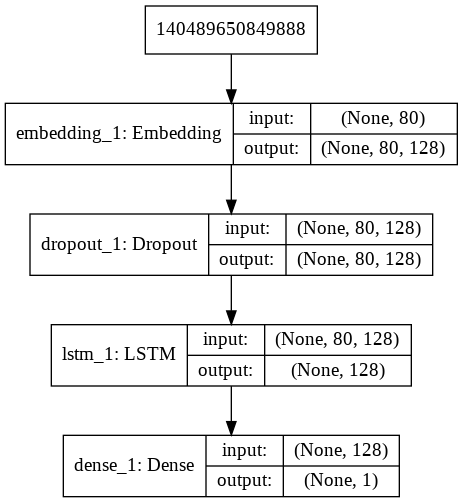

In [4]:
plot_model(model, to_file = 'model.png', show_shapes = True)
Image(retina = True, filename = 'model.png')

**Train Model**

In [5]:
History = model.fit(Xtrain, Ytrain,
                    batch_size = BatchSize,
                    epochs = Epochs,
                    validation_split = .2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 79s 4ms/step - loss: 0.4747 - acc: 0.7793 - val_loss: 0.3953 - val_acc: 0.8228
Epoch 2/5
20000/20000 [==============================] - 77s 4ms/step - loss: 0.3331 - acc: 0.8659 - val_loss: 0.4160 - val_acc: 0.8144
Epoch 3/5
20000/20000 [==============================] - 79s 4ms/step - loss: 0.2738 - acc: 0.8904 - val_loss: 0.3600 - val_acc: 0.8412
Epoch 4/5
20000/20000 [==============================] - 78s 4ms/step - loss: 0.2394 - acc: 0.9078 - val_loss: 0.3897 - val_acc: 0.8442
Epoch 5/5
20000/20000 [==============================] - 78s 4ms/step - loss: 0.2112 - acc: 0.9207 - val_loss: 0.4158 - val_acc: 0.8432


**Plot Results**

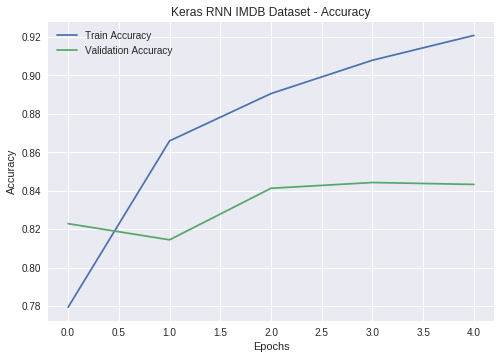

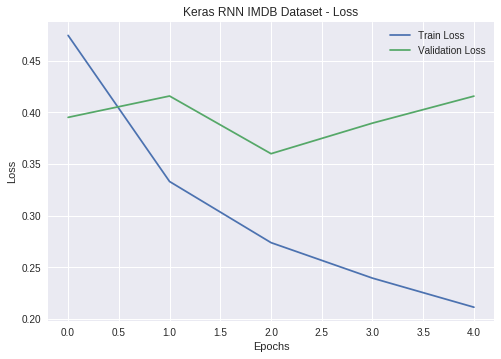

In [6]:
plt.plot(History.history['acc'], label = 'Train Accuracy')
plt.plot(History.history['val_acc'], label = 'Validation Accuracy')
plt.title('Keras RNN IMDB Dataset - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(History.history['loss'], label = 'Train Loss')
plt.plot(History.history['val_loss'], label = 'Validation Loss')
plt.title('Keras RNN IMDB Dataset - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()